In [1]:
import numpy as np
np.set_printoptions(precision=3) # only 3 decimals in print
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
from scipy.integrate import solve_ivp, quad
from scipy.optimize import fsolve
from scipy.spatial.distance import pdist, squareform

plt.rc("axes", labelsize = 11)
plt.rc("xtick", labelsize = 10, top = True, direction="in")
plt.rc("ytick", labelsize = 10, right = True, direction="in")
plt.rc("axes", titlesize = 13)
plt.rc("legend", fontsize = 10, loc = "best")
plt.rc('animation', html='jshtml')

In [2]:
from ipynb.fs.full.ex29_ols_regression import OrdinaryLeastSquares

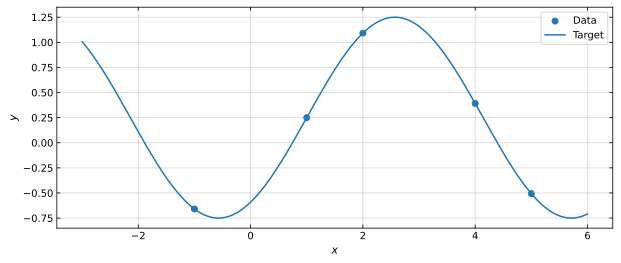

In [3]:
if __name__ == "__main__":
    target_func = lambda x: np.sin(x-1) + 0.25
    xs_data = np.array([-1, 1, 2, 4, 5])
    xrange = np.linspace(-3, 6, 200)

    # Plot
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.set(xlabel=r'$x$', ylabel=r'$y$')
    ax.grid(alpha=0.5)
    ax.scatter(xs_data, target_func(xs_data), label="Data")
    ax.plot(xrange, target_func(xrange), label="Target")
    ax.legend()

    fig.savefig('ex31_fig1.png')

In [4]:
class KernelRidgeRegression:
    def __init__(self, lambda_=1e-4, sigma=1, kernel='polynomial', degree=2):
        self.lambda_ = lambda_
        self.sigma = sigma
        self.kernel = kernel.lower()
        self.degree = degree
        self.coefficients = None

    def poly_kernel(self, x_i, x_j):
        return (1 + x_i * x_j)**self.degree
    
    def gaussian_kernel(self, x_i, x_j):
        return np.exp(-(x_i - x_j)**2 / (2 * self.sigma**2))
    
    def kernel_matrix(self, x_data):
        if self.kernel == 'polynomial':
            K_ij = self.poly_kernel
        elif self.kernel == 'gaussian':
            K_ij = self.gaussian_kernel
        else:
            raise ValueError("Invalid kernel.")
        
        N = len(x_data)
        K = np.zeros((N, N))
        for i in range(N):
            for j in range(N):
                K[i, j] = K_ij(x_data[i], x_data[j])
        return K
    
    def fit(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data
        K = self.kernel_matrix(x_data)
        N = len(x_data)
        self.coefficients = np.linalg.inv(K + self.lambda_ * np.eye(N)) @ y_data
    
    def predict(self, x_star):
        if self.kernel == 'polynomial':
            K_ij = self.poly_kernel
        elif self.kernel == 'gaussian':
            K_ij = self.gaussian_kernel
        else:
            raise ValueError("Invalid kernel.")
        
        y_arr = np.array([K_ij(x_star, x_data) for x_data in self.x_data])
        y_star = y_arr @ self.coefficients
        return y_star

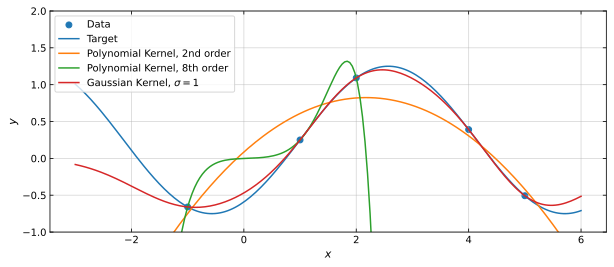

In [5]:
if __name__ == "__main__":
    # Plot function and data points
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.set(xlabel=r'$x$', ylabel=r'$y$', ylim=[-1,2])
    ax.grid(alpha=0.5)
    ax.scatter(xs_data, target_func(xs_data), label="Data")
    ax.plot(xrange, target_func(xrange), label="Target")

    # Kernel Ridge Regression with polynomial kernel of degree 2
    krr = KernelRidgeRegression(kernel='polynomial', degree=2)
    krr.fit(xs_data, target_func(xs_data))
    ys_pred = np.array([krr.predict(x) for x in xrange])
    ax.plot(xrange, ys_pred, label="Polynomial Kernel, 2nd order")

    # Kernel Ridge Regression with polynomial kernel of degree 8
    krr = KernelRidgeRegression(kernel='polynomial', degree=8)
    krr.fit(xs_data, target_func(xs_data))
    ys_pred = np.array([krr.predict(x) for x in xrange])
    ax.plot(xrange, ys_pred, label="Polynomial Kernel, 8th order")

    # Kernel Ridge Regression with Gaussian kernel
    krr = KernelRidgeRegression(kernel='gaussian', sigma=1)
    krr.fit(xs_data, target_func(xs_data))
    ys_pred = np.array([krr.predict(x) for x in xrange])
    ax.plot(xrange, ys_pred, label=fr"Gaussian Kernel, $\sigma = {1}$")

    ax.legend()

    fig.savefig('ex31_fig2.png')

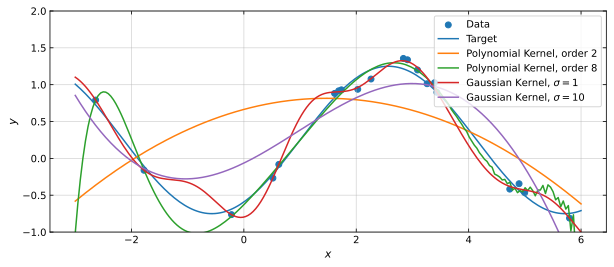

In [6]:
if __name__ == "__main__":
    # Now we do all the same but adding noise to the data
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.set(xlabel=r'$x$', ylabel=r'$y$', ylim=[-1,2])
    ax.grid(alpha=0.5)
    xs_data = np.random.uniform(-3, 6, 20)
    ys_data = target_func(xs_data) + np.random.normal(0, 0.1, len(xs_data))
    ax.scatter(xs_data, ys_data, label="Data")
    ax.plot(xrange, target_func(xrange), label="Target")

    # # Kernel Ridge Regression with polynomial kernel of degrees 2 and 8
    for degree in [2, 8]:
        krr = KernelRidgeRegression(kernel='polynomial', degree=degree)
        krr.fit(xs_data, ys_data)
        ys_pred = np.array([krr.predict(x) for x in xrange])
        ax.plot(xrange, ys_pred, label=f"Polynomial Kernel, order {degree}")

    # Kernel Ridge Regression with Gaussian kernel of sigma 1 and 10
    for sigma in [1, 10]:
        krr = KernelRidgeRegression(kernel='gaussian', sigma=sigma)
        krr.fit(xs_data, ys_data)
        ys_pred = np.array([krr.predict(x) for x in xrange])
        ax.plot(xrange, ys_pred, label=fr"Gaussian Kernel, $\sigma = {sigma}$")

    ax.legend()

    fig.savefig('ex31_fig3.png')